# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [46]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 609


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [51]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url+"&q="+city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | san luis de la loma
Processing Record 3 of Set 1 | murygino
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | lihue
Processing Record 6 of Set 1 | edinburgh of the seven seas
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | minas de marcona
Processing Record 9 of Set 1 | stanley
Processing Record 10 of Set 1 | kapuskasing
Processing Record 11 of Set 1 | hassi messaoud
Processing Record 12 of Set 1 | delta
Processing Record 13 of Set 1 | soe
Processing Record 14 of Set 1 | karachi
Processing Record 15 of Set 1 | warri
Processing Record 16 of Set 1 | griffith
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | port mathurin
Processing Record 19 of Set 1 | college
Processing Record 20 of Set 1 | hawaiian paradise park
Processing Record 21 of Set 1 | hayma'
City not found. Skipping...
Proc

In [52]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [53]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,19.26,76,20,13.87,GS,1717971155
1,san luis de la loma,17.2706,-100.8939,85.89,60,36,11.23,MX,1717971155
2,murygino,58.7383,49.4582,54.36,90,10,3.80,RU,1717971155
3,ushuaia,-54.8000,-68.3000,21.63,97,31,2.89,AR,1717971155
4,lihue,21.9789,-159.3672,85.24,65,20,14.97,US,1717971155


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,19.26,76,20,13.87,GS,1717971155
1,san luis de la loma,17.2706,-100.8939,85.89,60,36,11.23,MX,1717971155
2,murygino,58.7383,49.4582,54.36,90,10,3.80,RU,1717971155
3,ushuaia,-54.8000,-68.3000,21.63,97,31,2.89,AR,1717971155
4,lihue,21.9789,-159.3672,85.24,65,20,14.97,US,1717971155


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

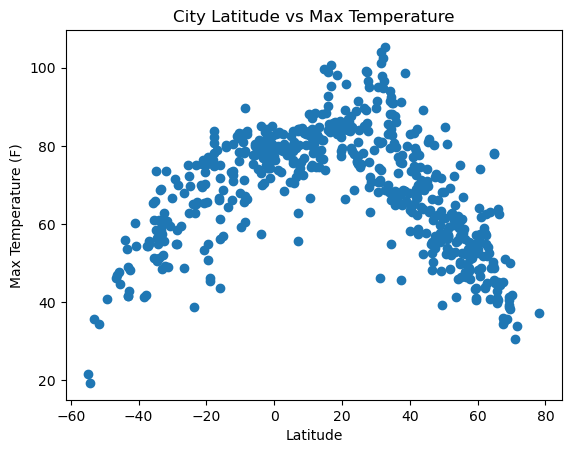

In [59]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"] )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs Max Temperature (2024-06-09)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

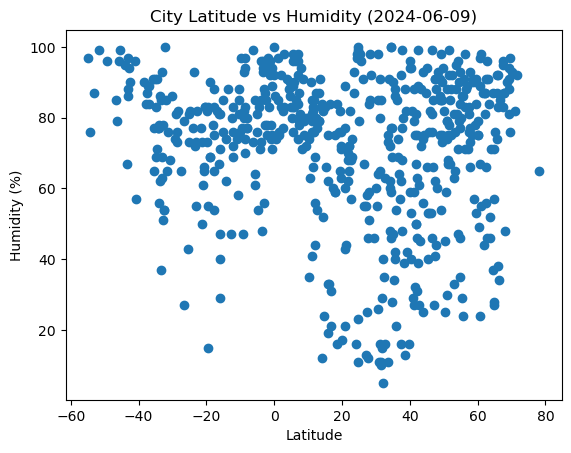

In [60]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"] )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2024-06-09)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

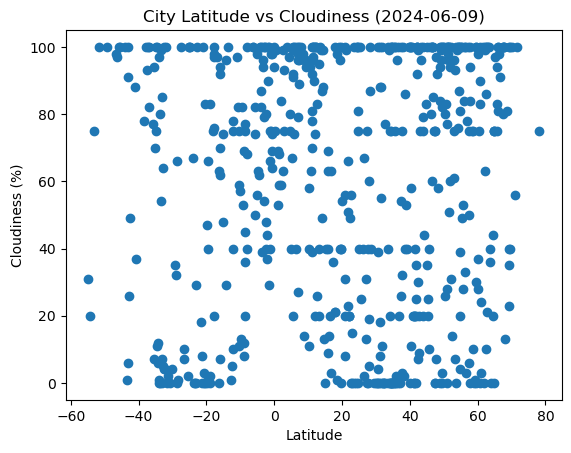

In [61]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"] )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness (2024-06-09)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

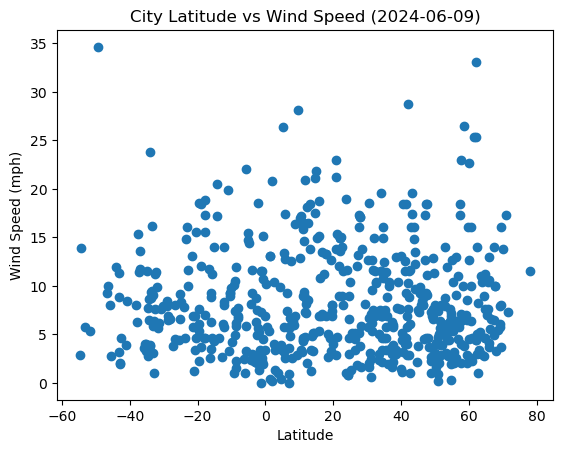

In [97]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"] )

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed (2024-06-09)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# x_values = city_data_df["Lat"]
# y_values = city_data_df["Max Temp"]

# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [64]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"]>=0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,san luis de la loma,17.2706,-100.8939,85.89,60,36,11.23,MX,1717971155
2,murygino,58.7383,49.4582,54.36,90,10,3.80,RU,1717971155
4,lihue,21.9789,-159.3672,85.24,65,20,14.97,US,1717971155
8,stanley,54.8680,-1.6985,49.71,84,20,6.91,GB,1717971156
9,kapuskasing,49.4169,-82.4331,39.31,90,100,12.86,CA,1717971156


In [65]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"]<=0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,19.26,76,20,13.87,GS,1717971155
3,ushuaia,-54.8000,-68.3000,21.63,97,31,2.89,AR,1717971155
5,edinburgh of the seven seas,-37.0676,-12.3116,55.71,84,82,13.58,SH,1717971155
6,port-aux-francais,-49.3500,70.2167,40.68,96,100,34.63,TF,1717971156
7,minas de marcona,-15.2119,-75.1103,56.97,76,48,14.03,PE,1717971156


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.7429686686624303


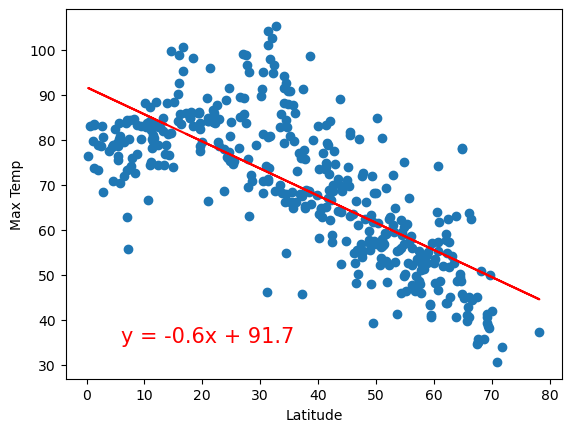

In [84]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(6,35),fontsize=15,color="red")
print("The r-value is "+str(rvalue))
plt.show()

The r-value is 0.7932254423329166


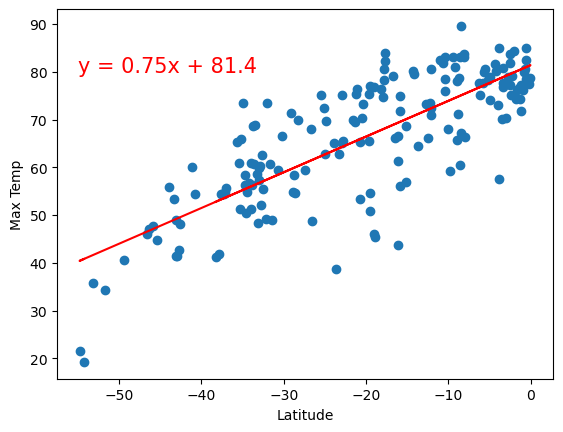

In [85]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-55,80),fontsize=15,color="red")
print("The r-value is "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**  
    It is evident from the linear regression models that temperatures are warmer near the equater and colder near the poles.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.016014091165409767


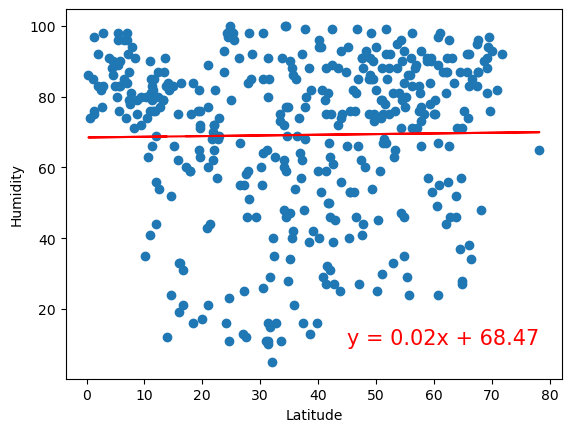

In [87]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
print("The r-value is "+str(rvalue))
plt.show()

The r-value is -0.010277881157013734


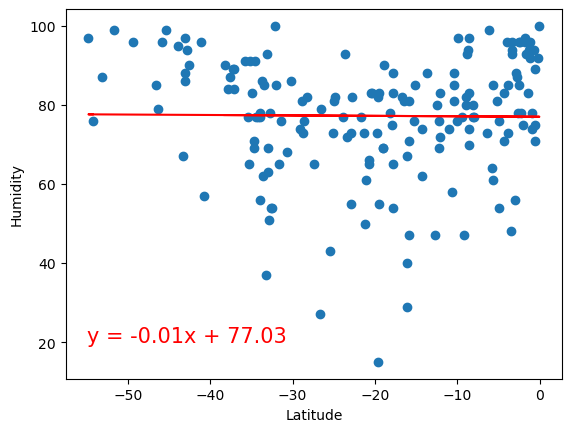

In [88]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")
print("The r-value is "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**  
    From these models, Latitude does not appear to have any effect on humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.001358098487456399


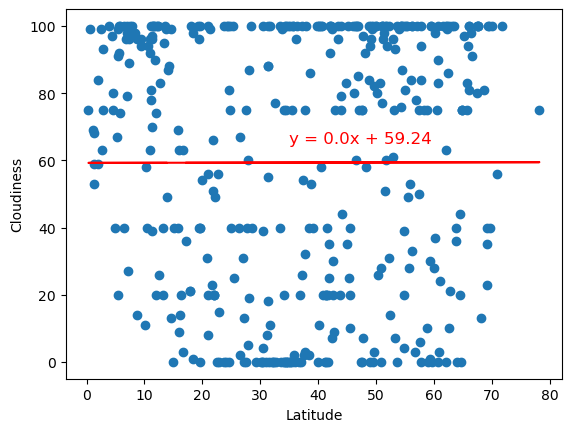

In [96]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(35,65),fontsize=12,color="red")
print("The r-value is "+str(rvalue))
plt.show()

The r-value is 0.11951149708478667


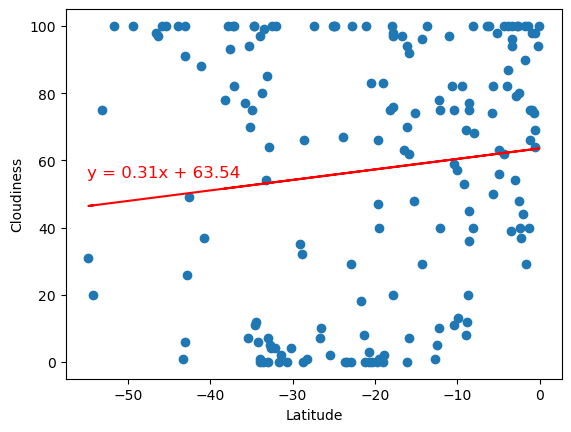

In [90]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-55,55),fontsize=12,color="red")
print("The r-value is "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**   
    From these models it appears that latitude does not have an effect on cloudiness in the northern hemisphere, but locations closer to the equator in the southern hemisphere experience slightly more cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is -0.05821646446704755


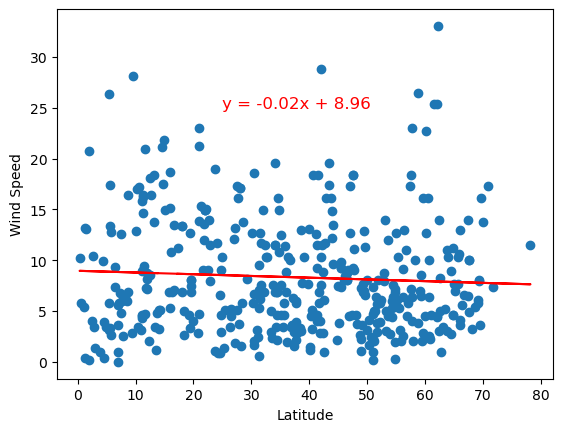

In [95]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(25,25),fontsize=12,color="red")
print("The r-value is "+str(rvalue))
plt.show()

The r-value is -0.10573923631359236


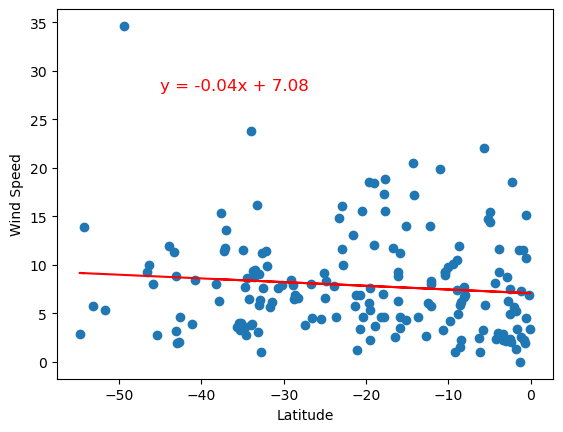

In [94]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"-r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-45,28),fontsize=12,color="red")
print("The r-value is "+str(rvalue))
plt.show()

**Discussion about the linear relationship:**   
    These models indicate that in the northern hemisphere windspeeds are slightly higher near the equator, and in the southern hemisphere they are slightly higher near the pole.